<a href="https://colab.research.google.com/github/projktapp/InstrumentosOpticos/blob/main/Entregable_3_Instumentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install imagecodecs
!pip install cairosvg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.7 MB/s eta 0:00:00


In [23]:
delx = 3.45*(10**(-6))
N = 2048
delf = 1/(delx*N)

def Espectro_angular(z, lamb, matrix):

  k = 2 * np.pi / lamb

  spectrum_z = np.fft.fft2(matrix)

  p = np.fft.ifftshift(np.arange(-2048/2, 2048/2))
  q = np.fft.ifftshift(np.arange(-2048/2, 2048/2))
  p, q = np.meshgrid(p, q)

  multiplier = np.exp(1j * z * k * np.sqrt(1 - (lamb * delf)**2 * (p**2 + q**2)))

  spectrum_0 = spectrum_z * multiplier
  #spectrum_0 = np.fft.fftshift(spectrum_0)


  aperture_field = np.fft.ifft2(spectrum_0)

  plt.imshow(np.abs(aperture_field), cmap='gray')
  plt.colorbar()
  plt.show()

  return aperture_field

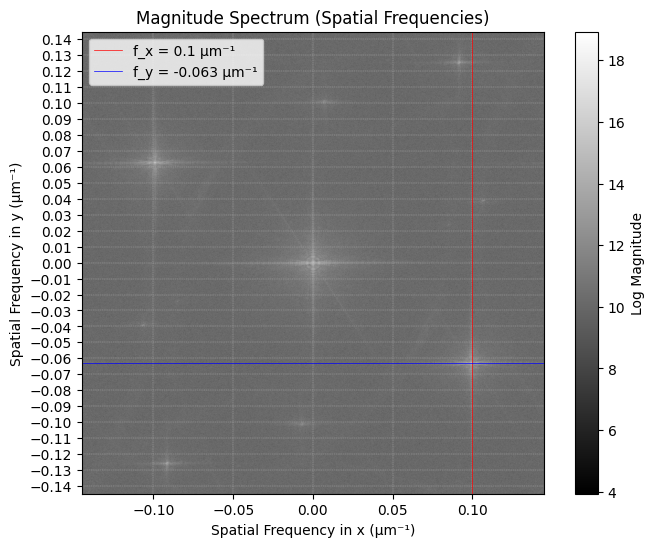

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import matplotlib.ticker as ticker

# Load your TIFF image from /content (adjust the path as needed)
image = io.imread('/content/Hologram.tiff', as_gray=True)

# Define the pixel size in micrometers
pixel_size = 3.45  # µm per pixel

# Get image dimensions
N_y, N_x = image.shape

# Compute the spatial frequency axes in cycles per micrometer
fx = np.fft.fftfreq(N_x, d=pixel_size)
fy = np.fft.fftfreq(N_y, d=pixel_size)

# Shift zero frequency to the center
fx = np.fft.fftshift(fx)
fy = np.fft.fftshift(fy)

# Perform the 2D Fourier Transform
F = np.fft.fft2(image)
F_shifted = np.fft.fftshift(F)

# Compute the magnitude spectrum (using logarithmic scaling)
magnitude_spectrum = np.abs(F_shifted)

# Define specific spatial frequency values for the lines (in µm^-1)
specific_fx = 0.1   # vertical line at f_x = 0.05 µm⁻¹
specific_fy = -0.063  # horizontal line at f_y = -0.03 µm⁻¹

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Display the Fourier magnitude spectrum
im = ax.imshow(np.log(magnitude_spectrum + 1),
               extent=(fx[0], fx[-1], fy[0], fy[-1]),
               origin='lower',  # makes y-axis increasing upward
               cmap='gray')

# Set titles and labels
ax.set_title("Magnitude Spectrum (Spatial Frequencies)")
ax.set_xlabel("Spatial Frequency in x (µm⁻¹)")
ax.set_ylabel("Spatial Frequency in y (µm⁻¹)")
fig.colorbar(im, ax=ax, label='Log Magnitude')

# Add thin, solid vertical and horizontal lines at the specified frequencies
ax.axvline(x=specific_fx, color='r', linewidth=0.5, label=f'f_x = {specific_fx} µm⁻¹')
ax.axhline(y=specific_fy, color='b', linewidth=0.5, label=f'f_y = {specific_fy} µm⁻¹')

# Add a legend for the lines
ax.legend()

# Set up more divisions on the axes: major ticks every 0.01 µm⁻¹
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.01))


# Optionally, display grid lines for clarity
ax.grid(which='both', linestyle='--', linewidth=0.3)

plt.show()


In [29]:
def calc_angles(fx, fy, wavelength):

    # 1. Calculate the wave number k:
    #    k = 2π / wavelength
    k = 2 * np.pi / wavelength

    fx = fx*(10**(-6))
    fy = fy*(10**(-6))

    theta = np.arcsin(2*np.pi*fy/k)
    beta = np.arcsin(2*np.pi*fx/(k*np.cos(theta)))

    phi = np.arccos(np.cos(beta)*np.cos(theta))

    return beta, theta, phi




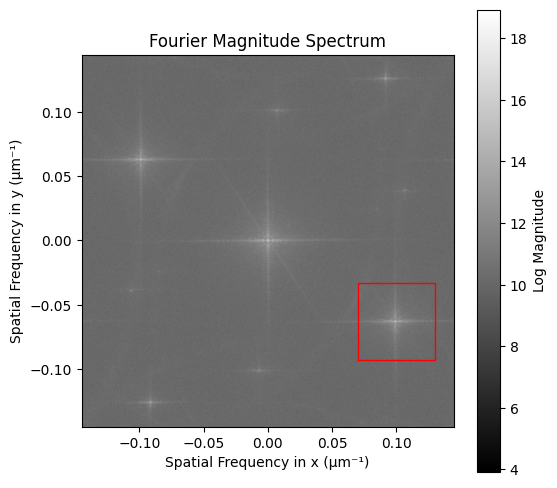

(424, 424)
(2048, 2048)


<ipython-input-16-db7ba4d9d3e3>:75: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(np.real(F_padded_transform)), cmap='gray')


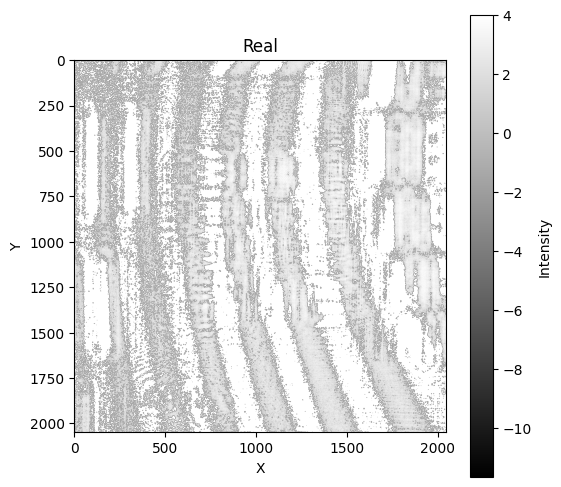

<ipython-input-16-db7ba4d9d3e3>:83: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(np.imag(F_padded_transform)), cmap='gray')


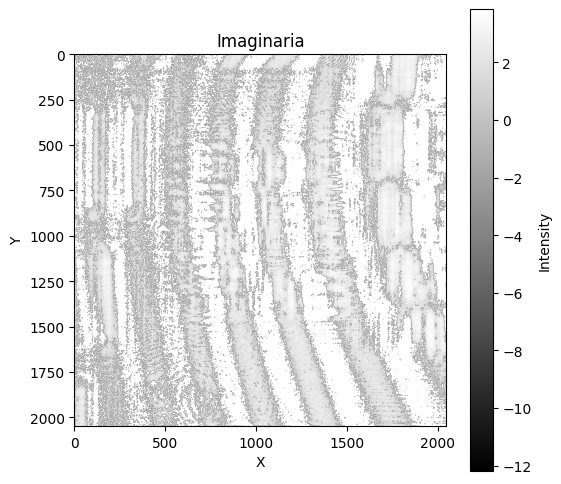

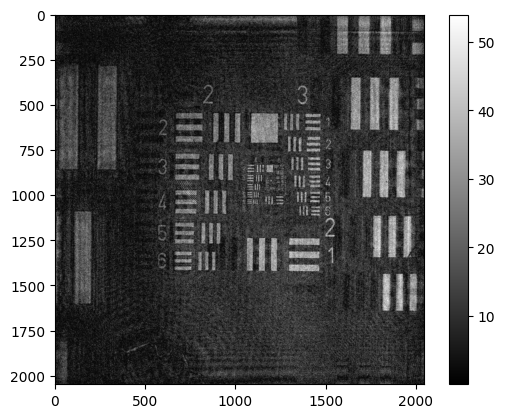

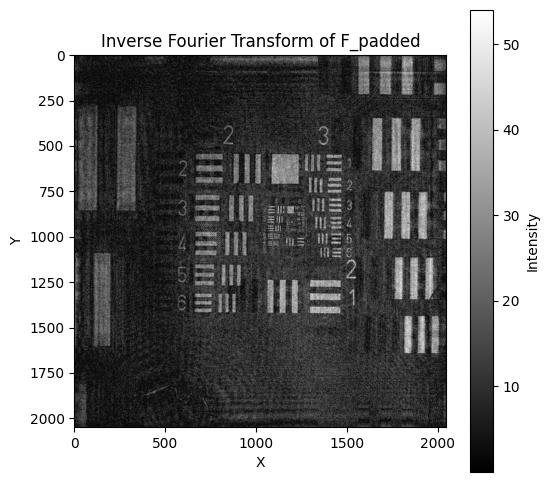

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

# Load the TIFF image as grayscale
image = io.imread('/content/Hologram.tiff', as_gray=True)

# Define the pixel size in micrometers
pixel_size = 3.45  # µm per pixel

# Get image dimensions
N_y, N_x = image.shape

# Compute the spatial frequency axes in cycles per micrometer
fx = np.fft.fftfreq(N_x, d=pixel_size)
fy = np.fft.fftfreq(N_y, d=pixel_size)

# Shift zero frequency to the center
fx = np.fft.fftshift(fx)
fy = np.fft.fftshift(fy)

# Create a meshgrid for 2D frequency evaluation
FX, FY = np.meshgrid(fx, fy)

# Compute the 2D Fourier transform and shift its zero frequency to the center
F = np.fft.fft2(image)
F_shifted = np.fft.fftshift(F)

# Define the center of the square region (in µm⁻¹) and its half-side length
center_fx = 0.1    # Center frequency in x (µm⁻¹)
center_fy = -0.063 # Center frequency in y (µm⁻¹)
filter_half_side = 0.03  # Half side length of the square region (µm⁻¹)

# Create a square mask (same size as F_shifted) that is True inside the square region
mask = (np.abs(FX - center_fx) <= filter_half_side) & (np.abs(FY - center_fy) <= filter_half_side)

# (Optional) Visualize the full Fourier magnitude with the square overlay
plt.figure(figsize=(6, 6))
plt.imshow(np.log(np.abs(F_shifted) + 1), extent=(fx[0], fx[-1], fy[0], fy[-1]),
           origin='lower', cmap='gray')
plt.title("Fourier Magnitude Spectrum")
plt.xlabel("Spatial Frequency in x (µm⁻¹)")
plt.ylabel("Spatial Frequency in y (µm⁻¹)")
# Overlay the square boundary
square_x = [center_fx - filter_half_side, center_fx + filter_half_side,
            center_fx + filter_half_side, center_fx - filter_half_side,
            center_fx - filter_half_side]
square_y = [center_fy - filter_half_side, center_fy - filter_half_side,
            center_fy + filter_half_side, center_fy + filter_half_side,
            center_fy - filter_half_side]
plt.plot(square_x, square_y, 'r-', linewidth=1)
plt.colorbar(label='Log Magnitude')
plt.show()

# --- Extract the square matrix from the Fourier transform ---
# Find the indices along fx and fy that lie within the square boundaries
idx_x = np.where((fx >= center_fx - filter_half_side) & (fx <= center_fx + filter_half_side))[0]
idx_y = np.where((fy >= center_fy - filter_half_side) & (fy <= center_fy + filter_half_side))[0]

# Crop the Fourier transform to extract the contiguous block that corresponds to the square region.
F_square_cropped = F_shifted[idx_y[0]:idx_y[-1]+1, idx_x[0]:idx_x[-1]+1]
print(F_square_cropped.shape)

pad_amount = 812

F_padded = np.pad(F_square_cropped, pad_width=((pad_amount, pad_amount), (pad_amount, pad_amount)),
                  mode='constant', constant_values=0)

print(F_padded.shape)

F_padded_transform = np.fft.ifftshift(F_padded)
F_padded_transform = np.fft.ifft2(F_padded_transform)

plt.figure(figsize=(6, 6))
plt.imshow(np.log(np.real(F_padded_transform)), cmap='gray')
plt.title("Real")
plt.xlabel("X")
plt.ylabel("Y")
plt.colorbar(label="Intensity")
plt.show()

plt.figure(figsize=(6, 6))
plt.imshow(np.log(np.imag(F_padded_transform)), cmap='gray')
plt.title("Imaginaria")
plt.xlabel("X")
plt.ylabel("Y")
plt.colorbar(label="Intensity")
plt.show()

AOrigen = Espectro_angular(0.086, 632.80e-9, F_padded_transform)
IntensOrigen = np.abs(AOrigen)


# Display the cropped square matrix (using log magnitude for better visibility)
plt.figure(figsize=(6, 6))
plt.imshow(IntensOrigen, cmap='gray')
plt.title("Inverse Fourier Transform of F_padded")
plt.xlabel("X")
plt.ylabel("Y")
plt.colorbar(label="Intensity")
plt.show()
# F_square_cropped now holds the square matrix with the frequency information inside the defined square.




In [30]:
beta, theta, phi = calc_angles(0.1, -0.063, 632.80e-9)
print("Beta (radians):", beta)
print("Theta (radians):", theta)
print("Phi (radians):", phi)


Beta (radians): 6.328000000000001e-14
Theta (radians): -3.9866399999999996e-14
Phi (radians): 0.0


In [5]:
import io
import numpy as np
import cairosvg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

output_width = 2848
output_height = 2848

png_data = cairosvg.svg2png(url='USAF-1951.svg',
                            output_width=output_width,
                            output_height=output_height)

img_matrix = mpimg.imread(io.BytesIO(png_data), format='png')

rgb = img_matrix[..., :3]
alpha = img_matrix[..., 3:]
img_composited = rgb * alpha + (1 - alpha) * 1.0

img_matrix = np.dot(img_composited, [0.2989, 0.5870, 0.1140])




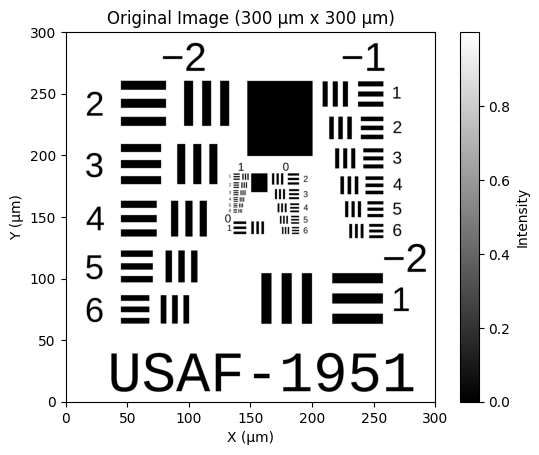

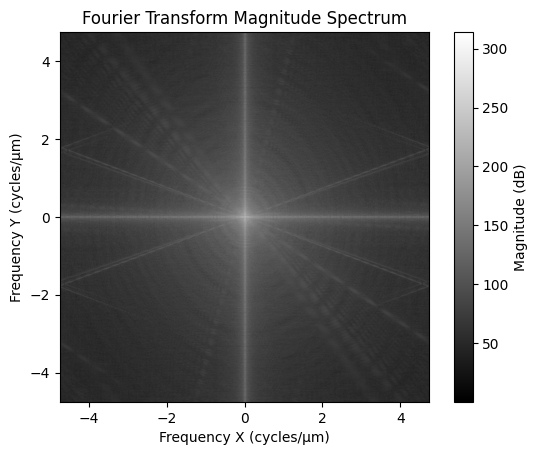

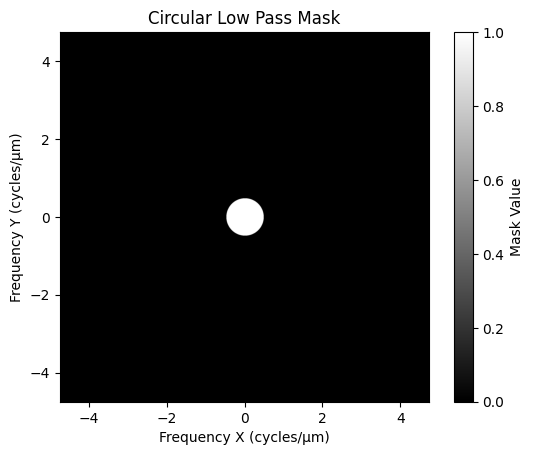

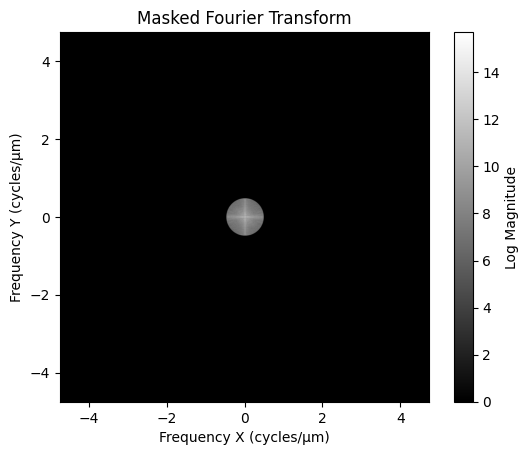

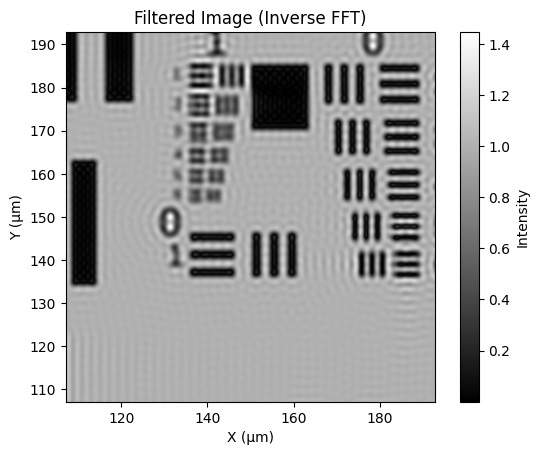

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import io
import cairosvg
import matplotlib.image as mpimg

# -------------------------------
# 1. Read and Prepare the Image
# -------------------------------
# Here, we assume that you have defined the following variables:
# - physical_size (e.g., 780.352 micrometers)
# - pixel_size (calculated from physical_size and the image resolution)
# - image (loaded from your SVG or other source)

# For example, using cairosvg to load an SVG:
img_size = 2848             # image resolution in pixels
physical_size = 300    # physical size in micrometers
pixel_size = physical_size / img_size  # µm per pixel

output_width = img_size
output_height = img_size

png_data = cairosvg.svg2png(url='USAF-1951.svg',
                            output_width=output_width,
                            output_height=output_height)

# Load the image
image = mpimg.imread(io.BytesIO(png_data), format='png')

# If the image has an alpha channel, composite it over white
if image.ndim == 3 and image.shape[2] == 4:
    rgb = image[..., :3]
    alpha = image[..., 3:]
    img_composited = rgb * alpha + (1 - alpha) * 1.0
    image = np.dot(img_composited, [0.2989, 0.5870, 0.1140])

# Rotate the image by 180 degrees
#image = np.rot90(image, k=2)
image = np.flipud(image)

# -------------------------------
# 2. Fourier Transform and Mask
# -------------------------------
# Compute the Fourier Transform of the image
F = np.fft.fft2(image)
Fshift = np.fft.fftshift(F)
magnitude_spectrum = 20 * np.log(np.abs(Fshift) + 1)

rows, cols = image.shape

# Define cutoff frequency (cycles/µm)
cutoff_freq = 0.48

# Compute frequency coordinates for each pixel.
freq_x = np.fft.fftfreq(cols, d=pixel_size)
freq_y = np.fft.fftfreq(rows, d=pixel_size)
freq_x = np.fft.fftshift(freq_x)
freq_y = np.fft.fftshift(freq_y)
fx, fy = np.meshgrid(freq_x, freq_y)

# Create a square low-pass mask
mask = (np.sqrt(fx**2 + fy**2) <= cutoff_freq).astype(np.uint8)

# Apply the mask in the Fourier domain and compute the inverse FFT.
Fshift_filtered = Fshift * mask
F_ishift = np.fft.ifftshift(Fshift_filtered)
img_back = np.fft.ifft2(F_ishift)
img_back = np.abs(img_back)

# Define the extents for spatial and frequency domains.
extent_spatial = [0, physical_size, 0, physical_size]
extent_freq = [freq_x.min(), freq_x.max(), freq_y.min(), freq_y.max()]

# -------------------------------
# 3. Plot Each Graph Separately
# -------------------------------

# Plot 1: Original Image (Spatial Domain)
plt.figure()
plt.imshow(image, cmap='gray', extent=extent_spatial, origin='lower')
plt.title("Original Image (300 µm x 300 µm)")
plt.xlabel("X (µm)")
plt.ylabel("Y (µm)")
plt.colorbar(label='Intensity')
plt.show()

# Plot 2: Fourier Transform Magnitude Spectrum (Frequency Domain)
plt.figure()
plt.imshow(magnitude_spectrum, cmap='gray', extent=extent_freq, origin='lower')
plt.title("Fourier Transform Magnitude Spectrum")
plt.xlabel("Frequency X (cycles/µm)")
plt.ylabel("Frequency Y (cycles/µm)")
plt.colorbar(label='Magnitude (dB)')
plt.show()

# Plot 3: Low Pass Mask (Frequency Domain)
plt.figure()
plt.imshow(mask, cmap='gray', extent=extent_freq, origin='lower')
plt.title("Circular Low Pass Mask")
plt.xlabel("Frequency X (cycles/µm)")
plt.ylabel("Frequency Y (cycles/µm)")
plt.colorbar(label='Mask Value')
plt.show()

# Plot 4: Masked Fourier Transform (Magnitude, Frequency Domain)
plt.figure()
plt.imshow(np.log(np.abs(Fshift_filtered) + 1), cmap='gray', extent=extent_freq, origin='lower')
plt.title("Masked Fourier Transform")
plt.xlabel("Frequency X (cycles/µm)")
plt.ylabel("Frequency Y (cycles/µm)")
plt.colorbar(label='Log Magnitude')
plt.show()

# Plot 5: Filtered Image (Spatial Domain) with Zoomed-in View
plt.figure()
plt.imshow(img_back, cmap='gray', extent=extent_spatial, origin='lower')
plt.title("Filtered Image (Inverse FFT)")
plt.xlabel("X (µm)")
plt.ylabel("Y (µm)")
plt.colorbar(label='Intensity')

zoom_factor = 3.5  # Adjust this for more or less zoom.
zoom_width = physical_size / zoom_factor
x_center = physical_size / 2
y_center = physical_size / 2
x_min = x_center - zoom_width / 2
x_max = x_center + zoom_width / 2
y_min = y_center - zoom_width / 2
y_max = y_center + zoom_width / 2
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.show()


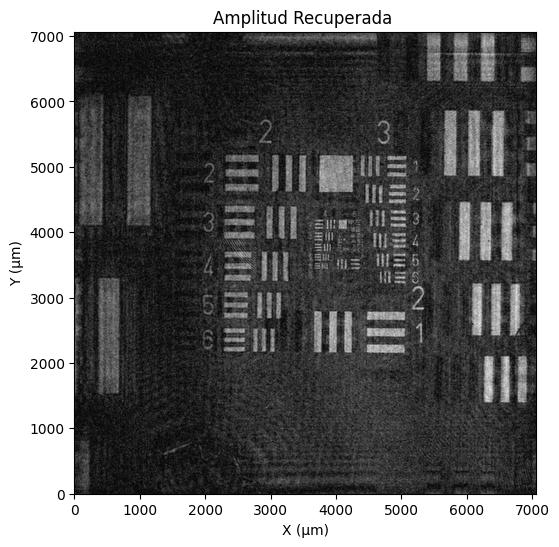

In [22]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Path to the TIFF image file.
filename = 'Hologram.tiff'

# Open the TIFF image using Pillow.
img = Image.open(filename)
img_array = np.array(img)

# Get image dimensions in pixels.
height, width = img_array.shape[:2]

# Calculate the physical pixel size assuming the image spans 7065.6 µm.
physical_size = 7065.6  # micrometers (assumed for both width and height)
pixel_size = physical_size / width  # µm per pixel

# Define the full spatial extent for plotting: [xmin, xmax, ymin, ymax].
extent = [0, physical_size, 0, physical_size]

# Compute zoom parameters.
zoom_factor = 1  # 3.5× zoom means we display 1/3.5 of the full size.
zoom_physical_size = physical_size / zoom_factor
center = physical_size / 2.0

x_min = center - zoom_physical_size / 2
x_max = center + zoom_physical_size / 2
y_min = center - zoom_physical_size / 2
y_max = center + zoom_physical_size / 2

# Plot the image with the zoomed-in region.
plt.figure(figsize=(6, 6))
plt.imshow(IntensOrigen, cmap='gray', extent=extent, origin='upper')
plt.xlabel("X (µm)")
plt.ylabel("Y (µm)")
plt.title("Amplitud Recuperada ")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()
